# <font color='red'> Project 2

### Project Description:
- Use the same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

# [1] Data Set Information

This Dataset has been taken from kaggle.com
The source of the data set is given as follows: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### File Description

### Data fields: Attribute Information

# [2] Importing Basic Libraries

In [22]:
#loading Packages
import numpy as np
import matplotlib as mlt
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

# [3] Reading the datasets

In [23]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print('Shape of train data: ', data.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (1460, 81)
Shape of test data:  (1459, 80)


# [4] Initial Overview of the datasets

In [24]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [25]:
#taking the statistic summary
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# [5] Pre-processing the datasets and cleaning them 

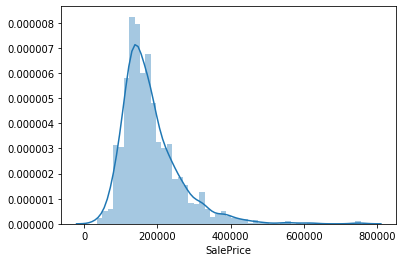

In [27]:
#plotting the histogram
sns.distplot(data['SalePrice']);

We observe the following: 1. Normality, 2. Slightly left skewed

# [6] Handling missing data

In [28]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

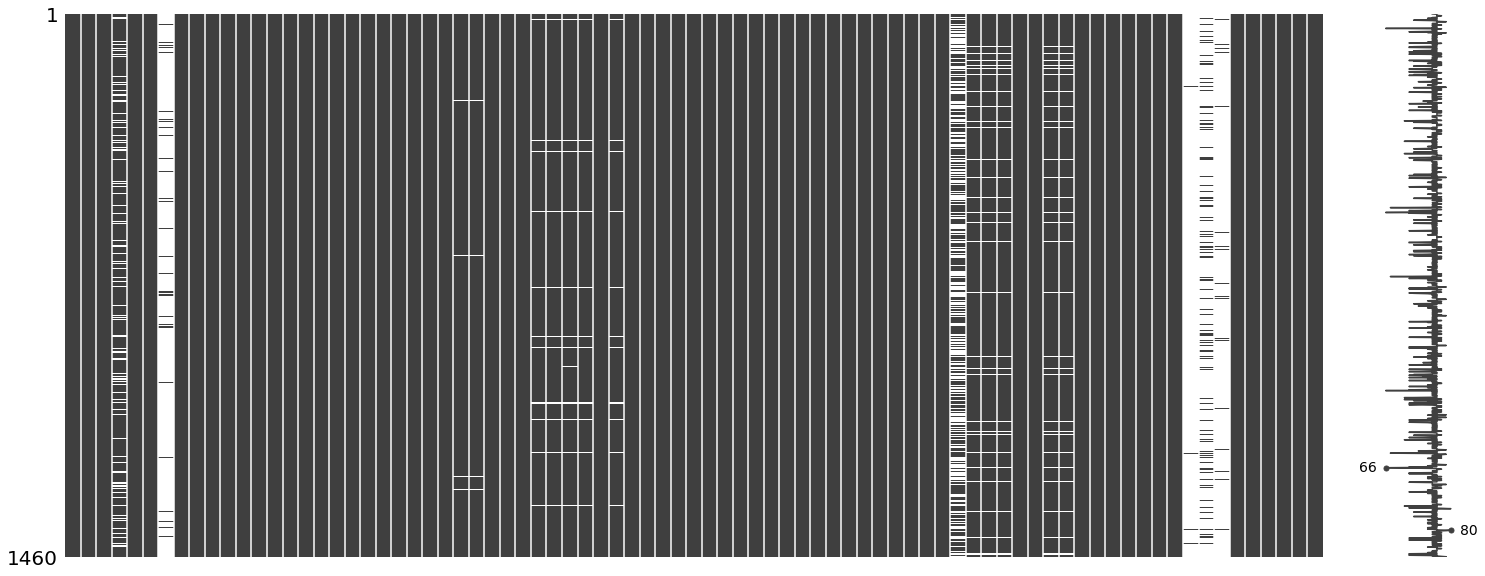

In [29]:
import missingno as msno
msno.matrix(data)

# [7] Imputing missing data

In [30]:
#filling NA's of continuous variables with the mean of the column:
data['LotFrontage'].fillna((data['LotFrontage'].mean()), inplace=True)
data['MasVnrArea'].fillna((data['MasVnrArea'].mean()), inplace=True)
data['GarageYrBlt'].fillna((data['GarageYrBlt'].mean()), inplace=True)

In [31]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [32]:
data = data.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
data =data.dropna()
data.shape

(1338, 76)

In [33]:
cat = []

for i in data.columns:
    if data[i].dtype == 'O':
        cat.append(i)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat:
    print("Encoding",i)
    data[i] = le.fit_transform(data[i])

Encoding MSZoning
Encoding Street
Encoding LotShape
Encoding LandContour
Encoding Utilities
Encoding LotConfig
Encoding LandSlope
Encoding Neighborhood
Encoding Condition1
Encoding Condition2
Encoding BldgType
Encoding HouseStyle
Encoding RoofStyle
Encoding RoofMatl
Encoding Exterior1st
Encoding Exterior2nd
Encoding MasVnrType
Encoding ExterQual
Encoding ExterCond
Encoding Foundation
Encoding BsmtQual
Encoding BsmtCond
Encoding BsmtExposure
Encoding BsmtFinType1
Encoding BsmtFinType2
Encoding Heating
Encoding HeatingQC
Encoding CentralAir
Encoding Electrical
Encoding KitchenQual
Encoding Functional
Encoding GarageType
Encoding GarageFinish
Encoding GarageQual
Encoding GarageCond
Encoding PavedDrive
Encoding SaleType
Encoding SaleCondition


In [35]:
data.shape

(1338, 76)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null int32
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
Street           1338 non-null int32
LotShape         1338 non-null int32
LandContour      1338 non-null int32
Utilities        1338 non-null int32
LotConfig        1338 non-null int32
LandSlope        1338 non-null int32
Neighborhood     1338 non-null int32
Condition1       1338 non-null int32
Condition2       1338 non-null int32
BldgType         1338 non-null int32
HouseStyle       1338 non-null int32
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null int32
RoofMatl         1338 non-null int32
Exterior1st      1338 non-null int32
Exterior2nd      1338 non-null int32
Mas


### Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with AdaBoost boosting.
- Apply one model with gradient boosting.
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

### Bagging Models:-
###### 1) Decision Tree Regressor
###### 2) Random Forest Regressor
### Pasting Models:-
###### 1) SVM (Kernel = 'linear')
###### 2) Random Forest Regressor
### AdaBoosting Models:-
###### 1) Decision Tree Regressor
###### 2) Random Forest Regressor    
### GradientBoosting Regressor   
### Regression Models before using PCA:-
###### 1) Linear Regression
###### 2) KNN Regressor
###### 3) Ridge
###### 4) LASSO
###### 5) Polynomial Regression
###### 6) Decision Tree Regressor
###### 7) Linear SVM
###### 8) Kernelized SVM (kernel ='linear')
###### 9) Kernelized SVM (kernel =poly)
### Regression Models after using PCA:-
###### 1) Linear Regression
###### 2) KNN Regressor
###### 3) Ridge
###### 4) LASSO
###### 5) Polynomial Regression
###### 6) Decision Tree Regressor
###### 7) Linear SVM
###### 8) Kernelized SVM (kernel ='linear')
###### 9) Kernelized SVM (kernel =poly)
### Regression Model Using Neural Networks

## Evaluation Metrics for Regression

For Regression tasks, the best model is evaluated on the basis of least Root Mean Squared error (RMSE) followed by Train and Test Scores.

RMSE is given by np.sqrt(mean_squared_error(y_test,pred_linear))

### Creating dataframe to store results

In [37]:
columns = ['Model', 'Regressor', 'Train Score', 'Test Score', 'MSE','MAE','RMSE']
reg_model = pd.DataFrame(columns=columns)

# Making the train test split

In [38]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Splitting data

from sklearn.model_selection import train_test_split

X=data.drop(columns=['SalePrice'],axis=1)
y =data['SalePrice']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(936, 75)
(936,)
(402, 75)
(402,)


# [1] Bagging models

In [19]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

train_score_array = []
test_score_array = []
best_score=0


for n in range(1,10):
    for max_samples in [50,100,150,200,250,500]:
        for n_estimators in [50,100,150,200,250,500]:
            dtree_reg=DecisionTreeRegressor(max_depth=n)
            bag_reg_dt = BaggingRegressor(dtree_reg, n_estimators=n_estimators, max_samples=max_samples, bootstrap=True,random_state=0,oob_score=True)
            bag_reg_dt.fit(X_train, y_train)
            train_score_array.append(bag_reg_dt.score(X_train, y_train))
            test_score_array.append(bag_reg_dt.score(X_test, y_test))
            score=bag_reg_dt.score(X_test, y_test)
            if(score>best_score):
                best_score=score
                best_parameters = {'max_samples': max_samples, 'max_depth': n,'n_estimators':n_estimators}

print(best_parameters)

{'max_samples': 500, 'max_depth': 9, 'n_estimators': 50}


Text(0, 0.5, 'Scores')

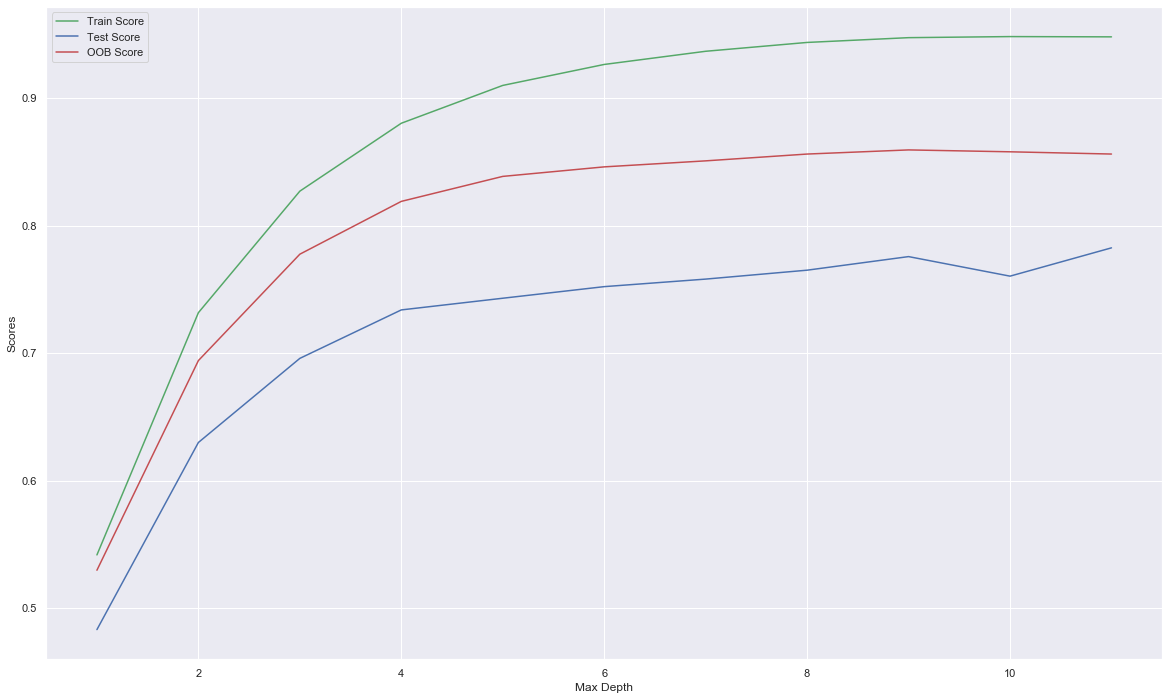

In [39]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []
oob_score_array=[]

for n in range(1,12):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=50, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
    bag_reg_dt.fit(X_train, y_train)
    train_score_array.append(bag_reg_dt.score(X_train, y_train))
    test_score_array.append(bag_reg_dt.score(X_test, y_test))
    oob_score_array.append(bag_reg_dt.oob_score_)

x_axis = range(1,12)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.plot(x_axis, oob_score_array, c = 'r', label = 'OOB Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [40]:
dt_reg = DecisionTreeRegressor(max_depth=9,random_state=0)
bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=100, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
bag_reg_dt.fit(X_train, y_train)

y_pred=bag_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(bag_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(bag_reg_dt.score(X_test, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Bagging Regressor',
                                                'Regressor' : 'Decision Trees',
                                        'Train Score' : bag_reg_dt.score(X_train, y_train),
                                       'Test Score' : bag_reg_dt.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 94.9034 %
Test score: 77.2882 %
MAE: 18404.7738
MSE: 1366596896.2489
RMSE: 36967.5114


## 2) Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
rf_reg = RandomForestRegressor(n_estimators=100,random_state=0)
bag_reg_rf = BaggingRegressor(rf_reg, n_estimators=100, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
bag_reg_rf.fit(X_train, y_train)

y_pred=bag_reg_rf.predict(X_test)

print('Train score: {:.4f} %'.format(bag_reg_rf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(bag_reg_rf.score(X_test, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Bagging Regressor',
                                                'Regressor' : 'Random Forests',
                                        'Train Score' : bag_reg_rf.score(X_train, y_train),
                                       'Test Score' : bag_reg_rf.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 92.2525 %
Test score: 76.8058 %
MAE: 18527.0267
MSE: 1395623590.9650
RMSE: 37358.0459


## Pasting Models

### 1) Pasting with SVM (kernel = linear)

In [36]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

train_score_array = []
test_score_array = []
best_score=0


for C in [0.001,0.01,0.1,1,10,100]:
    for gamma in [0.001,0.01,0.1,1,10,100]:
        for n_estimators in [50,100,150,200,250,500]:
            svm_reg=SVR(C=C,gamma=gamma,kernel='linear')
            bag_reg_svm = BaggingRegressor(svm_reg, n_estimators=n_estimators, max_samples=500, bootstrap=False,random_state=0)
            bag_reg_svm.fit(X_train, y_train)
            train_score_array.append(bag_reg_svm.score(X_train, y_train))
            test_score_array.append(bag_reg_svm.score(X_test, y_test))
            score=bag_reg_svm.score(X_test, y_test)
            if(score>best_score):
                best_score=score
                best_parameters = {'C': C, 'gamma': gamma,'n_estimators':n_estimators}

print(best_parameters)

{'C': 100, 'gamma': 0.001, 'n_estimators': 500}


In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svm_reg=SVR(C=100,gamma=0.1, kernel='linear')

bag_reg_svm = BaggingRegressor(svm_reg, n_estimators=500, bootstrap=True,random_state=0)
bag_reg_svm.fit(X_train, y_train)

y_pred=bag_reg_svm.predict(X_test)

print('Train score: {:.4f} %'.format(bag_reg_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(bag_reg_svm.score(X_test, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Pasting Regressor',
                                                'Regressor' : 'SVR(kernel=linear)',
                                        'Train Score' : bag_reg_svm.score(X_train, y_train),
                                       'Test Score' : bag_reg_svm.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 43.8511 %
Test score: 42.1868 %
MAE: 34332.3889
MSE: 3478695746.7979
RMSE: 58980.4692


### 2) Pasting with Decision Tree

Text(0, 0.5, 'Scores')

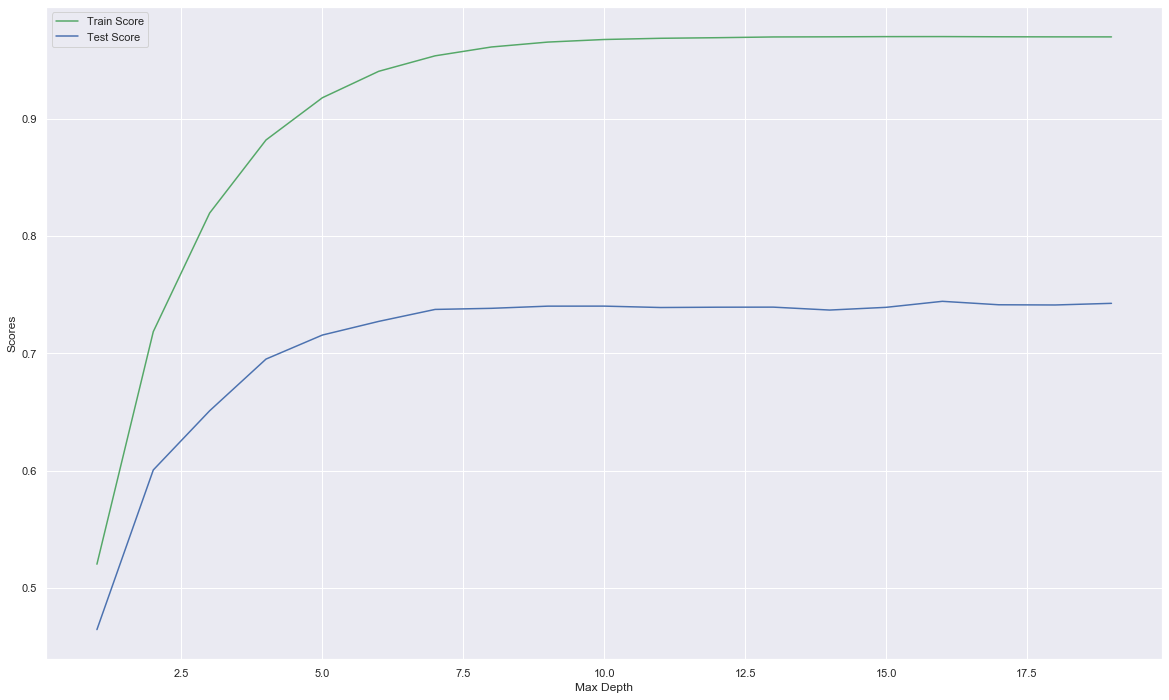

In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []

for n in range(1,20):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
    bag_reg_dt.fit(X_train, y_train)
    train_score_array.append(bag_reg_dt.score(X_train, y_train))
    test_score_array.append(bag_reg_dt.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [43]:
from sklearn.tree import DecisionTreeRegressor


dt_reg = DecisionTreeRegressor(max_depth=6,random_state=0)
bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
bag_reg_dt.fit(X_train, y_train)

y_pred=bag_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(bag_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(bag_reg_dt.score(X_test, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Pasting Regressor',
                                                'Regressor' : 'Decision Trees',
                                        'Train Score' : bag_reg_dt.score(X_train, y_train),
                                       'Test Score' : bag_reg_dt.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 94.0277 %
Test score: 72.7157 %
MAE: 20131.6887
MSE: 1641730126.9502
RMSE: 40518.2691


## Adaboosting Models

In [40]:
from sklearn.ensemble import AdaBoostRegressor

train_score_array = []
test_score_array = []
best_score=0


for n in range(1,10):
    for learning_rate in [0.001,0.01,0.1,1,10,100]:
        for n_estimators in [50,100,150,200,250,500]:
            dtree_reg=DecisionTreeRegressor(max_depth=n)
            ada_reg_dtree = AdaBoostRegressor(dtree_reg, n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
            ada_reg_dtree.fit(X_train, y_train)
            train_score_array.append(ada_reg_dtree.score(X_train, y_train))
            test_score_array.append(ada_reg_dtree.score(X_test, y_test))
            score=ada_reg_dtree.score(X_test, y_test)
            if(score>best_score):
                best_score=score
                best_parameters = {'learning_rate': learning_rate, 'max_depth': n,'n_estimators':n_estimators}

print(best_parameters)

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 50}


Text(0, 0.5, 'Scores')

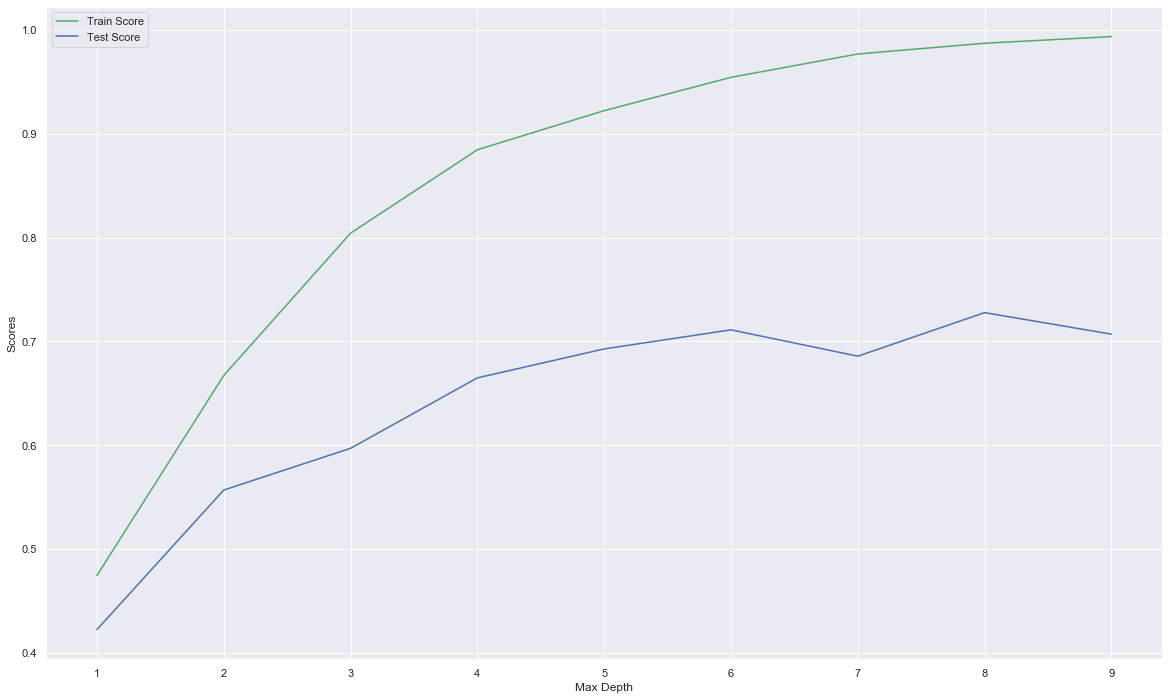

In [44]:
from sklearn.ensemble import AdaBoostRegressor
train_score_array = []
test_score_array = []

for n in range(1,10):
    dtree_reg=DecisionTreeRegressor(max_depth=n)
    ada_reg_dtree = AdaBoostRegressor(dtree_reg, n_estimators=50,learning_rate=0.01,random_state=0)
    ada_reg_dtree.fit(X_train, y_train)
    train_score_array.append(ada_reg_dtree.score(X_train, y_train))
    test_score_array.append(ada_reg_dtree.score(X_test, y_test))

    
x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [45]:
from sklearn.ensemble import AdaBoostRegressor


dt_reg = DecisionTreeRegressor(max_depth=6,random_state=0)
ada_reg_dt = AdaBoostRegressor(dt_reg, n_estimators=150,learning_rate=0.1,random_state=0)

ada_reg_dt.fit(X_train,y_train)

y_pred=ada_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(ada_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ada_reg_dt.score(X_test, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


reg_model = reg_model.append({'Model' : 'Adaboost Regressor',
                                                'Regressor' : 'Decision Trees',
                                        'Train Score' : ada_reg_dt.score(X_train, y_train),
                                       'Test Score' : ada_reg_dt.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 97.3276 %
Test score: 68.4732 %
MAE: 20086.9877
MSE: 1897008252.0878
RMSE: 43554.6582


### 2) SVR (kernel='linear')

In [46]:
svm_reg=SVR(C=100,gamma=1, kernel='linear')
ada_reg_svm = AdaBoostRegressor(svm_reg, n_estimators=500,learning_rate=0.1,random_state=0)
ada_reg_svm.fit(X_train, y_train)

y_pred=ada_reg_svm.predict(X_test)

print('Train score: {:.4f} %'.format(ada_reg_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ada_reg_svm.score(X_test, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


reg_model = reg_model.append({'Model' : 'Adaboost Regressor',
                                                'Regressor' : 'SVR(kernel=linear)',
                                        'Train Score' : ada_reg_svm.score(X_train, y_train),
                                       'Test Score' : ada_reg_svm.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 56.6670 %
Test score: 53.2003 %
MAE: 32009.5040
MSE: 2815998407.5850
RMSE: 53065.9816


## Gradient Boosting Model

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbt_rf = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,random_state=0)
gbt_rf.fit(X_train, y_train)

y_pred=gbt_rf.predict(X_test)

print('Train score: {:.4f} %'.format(gbt_rf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(gbt_rf.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 99.6292 %
Test score: 72.1467 %
RMSE: 40938.6305


In [45]:
from pprint import pprint
pprint(gbt_rf.get_params())

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [46]:
param_grid_gbt = {
            'max_depth': range(1,10),
            'alpha': [0.5,0.6,0.7,0.8,0.9],
            'n_estimators': [50,100,150,200,500],
            'learning_rate': [0.01,0.1,0.5,1]
            }

CV_gbt = GridSearchCV(estimator =gbt_rf, param_grid = param_grid_gbt , return_train_score=True, verbose = 1, n_jobs = -1)
CV_gbt.fit(X_train, y_train)

best_parameters_gbt=CV_gbt.best_params_
print(best_parameters_gbt)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  9.7min finished


{'alpha': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}


In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gbt_rf = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,random_state=0,max_depth=2,alpha=0.5)
gbt_rf.fit(X_train, y_train)

y_pred=gbt_rf.predict(X_test)

print('Train score: {:.4f} %'.format(gbt_rf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(gbt_rf.score(X_test, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


reg_model = reg_model.append({'Model' : 'GradientBoostingRegressor',
                                                'Regressor' : 'GradientBoostingRegressor',
                                        'Train Score' : gbt_rf.score(X_train, y_train),
                                       'Test Score' : gbt_rf.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 98.4014 %
Test score: 67.4412 %
MAE: 16924.9760
MSE: 1959108374.8699
RMSE: 44261.8162


## Neural Networks

### 1) Perceptron

In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#step 1: build model
model_nn_1 = Sequential()
#input layer
model_nn_1.add(Dense(10, input_dim = 75, activation = 'sigmoid'))
#hidden layers
#output layer
model_nn_1.add(Dense(1, activation=None))

#step 2: make computational graph - compile
model_nn_1.compile(loss='mean_squared_error' , optimizer = 'sgd',metrics=['mae'] )

#step 3: train the model - fit
model_nn_1.fit(X_train, y_train, epochs =100, batch_size = 100)
#step 4: evaluation

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
936/936 [==============================] - 0s 127us/sample - loss: 20111789519.8633 - mean_absolute_error: 110129.6562
Epoch 2/100
936/936 [==============================] - 0s 13us/sample - loss: 6770430645.6068 - mean_absolute_error: 56681.3711
Epoch 3/100
936/936 [==============================] - 0s 9us/sample - loss: 6323617048.0684 - mean_absolute_error: 57898.2930
Epoch 4/100
936/936 [==============================] - 0s 9us/sample - loss: 6310961121.3675 - mean_absolute_error: 58115.8906
Epoch 5/100
936/936 [==============================] - 0s 13us/sample - loss: 6315529433.7094 - mean_absolute_error: 58083.5078
Epoch 6/100
936/936 [==============================] - 0s 8us/sample - loss: 6316541321.8462 - mean_absolute_error: 58056.6484
Epoch 7/100
936/936 [==============================] - 0s 13us/s

In [50]:
model_nn_1.evaluate(X_train, y_train)

936/936 [==============================] - 0s 51us/sample - loss: 6310976188.1709 - mean_absolute_error: 58664.3672


[6310976188.17094, 58664.367]

In [51]:
model_nn_1.evaluate(X_test, y_test)

402/402 [==============================] - 0s 20us/sample - loss: 6047818660.2985 - mean_absolute_error: 56225.1484


[6047818660.298508, 56225.15]

In [52]:
y_pred=model_nn_1.predict(X_test)


print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Deep Learning Model',
                                                'Regressor' : 'Perceptron',
                                        'Train Score' : 0.90,
                                       'Test Score' : 0.86,
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

MAE: 56225.1496
MSE: 6047818759.7560
RMSE: 77767.7231


 ### 2) Multi-Layer Perceptron (MLP)

In [53]:
#step 1: build model
model_nn_2 = Sequential()
#input layer
model_nn_2.add(Dense(10, input_dim = 75, activation = 'sigmoid'))
#hidden layers
model_nn_2.add(Dense(20, activation = 'sigmoid'))
model_nn_2.add(Dense(20, activation = 'sigmoid'))
#output layer
model_nn_2.add(Dense(1))

#step 2: compile the model
model_nn_2.compile(loss='mean_squared_error' , optimizer = 'sgd',metrics=['mae'] )

#step 3: train the model
model_nn_2.fit(X_train, y_train, epochs = 100, batch_size = 100)

#step 4: evaluate

Epoch 1/100
936/936 [==============================] - 0s 106us/sample - loss: 19194270013.2650 - mean_absolute_error: 106861.2188
Epoch 2/100
936/936 [==============================] - 0s 9us/sample - loss: 6571779627.7607 - mean_absolute_error: 56652.9844
Epoch 3/100
936/936 [==============================] - 0s 13us/sample - loss: 6313373103.0427 - mean_absolute_error: 58247.3906
Epoch 4/100
936/936 [==============================] - 0s 9us/sample - loss: 6314953708.3077 - mean_absolute_error: 58447.2344
Epoch 5/100
936/936 [==============================] - 0s 13us/sample - loss: 6314319349.0598 - mean_absolute_error: 58079.0977
Epoch 6/100
936/936 [==============================] - 0s 9us/sample - loss: 6317870798.7692 - mean_absolute_error: 58074.8281
Epoch 7/100
936/936 [==============================] - 0s 9us/sample - loss: 6316387892.5128 - mean_absolute_error: 58308.5117
Epoch 8/100
936/936 [==============================] - 0s 13us/sample - loss: 6320852882.5983 - mean_abso

In [54]:
model_nn_2.evaluate(X_train, y_train)

936/936 [==============================] - 0s 64us/sample - loss: 6309360106.1197 - mean_absolute_error: 57840.0742


[6309360106.119658, 57840.074]

In [55]:
model_nn_2.evaluate(X_test, y_test)

402/402 [==============================] - 0s 20us/sample - loss: 6021592595.1045 - mean_absolute_error: 55206.0391


[6021592595.104478, 55206.04]

In [56]:
y_pred=model_nn_2.predict(X_test)

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Deep Learning Model',
                                                'Regressor' : 'MLP',
                                        'Train Score' : 0.90,
                                       'Test Score' : 0.86,
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

MAE: 55206.0382
MSE: 6021592613.9176
RMSE: 77598.9215


## Regression Tasks without PCA

### [1] Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)

print('Train score: {:.4f} %'.format(lreg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


reg_model = reg_model.append({'Model' : 'Linear Regression',
                                                'Regressor' : 'Linear Regression without PCA',
                                        'Train Score' : lreg.score(X_train, y_train),
                                       'Test Score' : lreg.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 90.3704 %
Test score: 52.3518 %
MAE: 22177.2388
MSE: 2867054673.4726
RMSE: 53544.8847


0.00047817182445442086


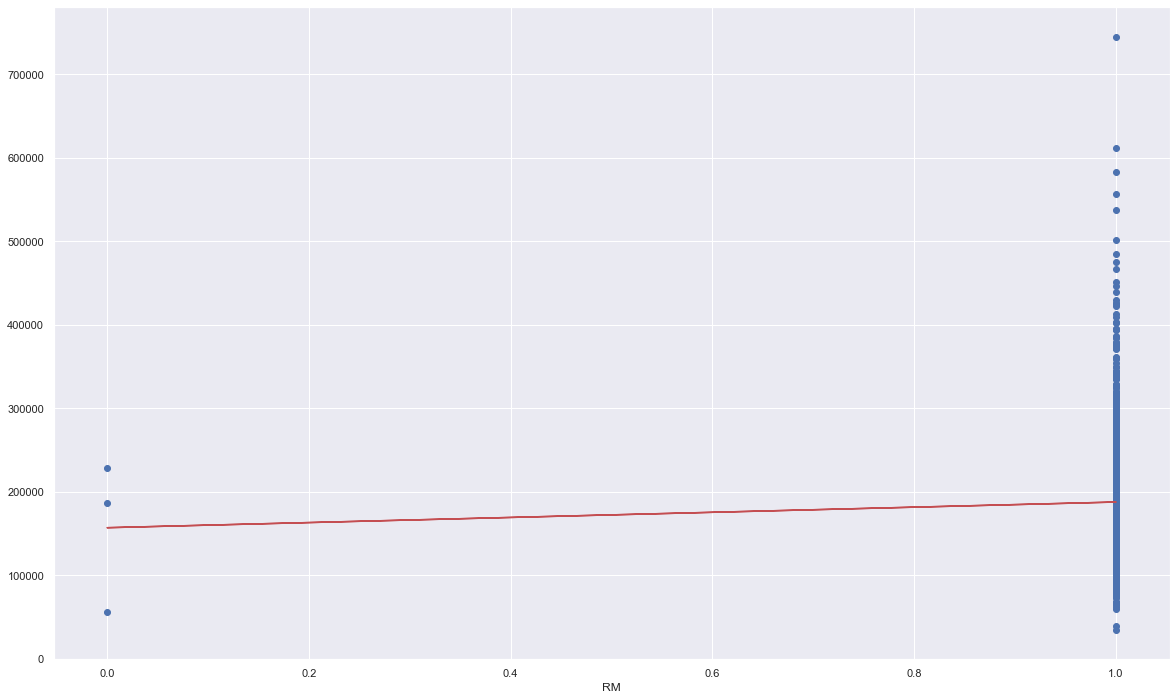

In [58]:
sns.set(rc={'figure.figsize':(20,12)})


X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

print(lreg.score(X_train_rm, y_train))

## [2] KNN Regressor

Text(0, 0.5, 'Score')

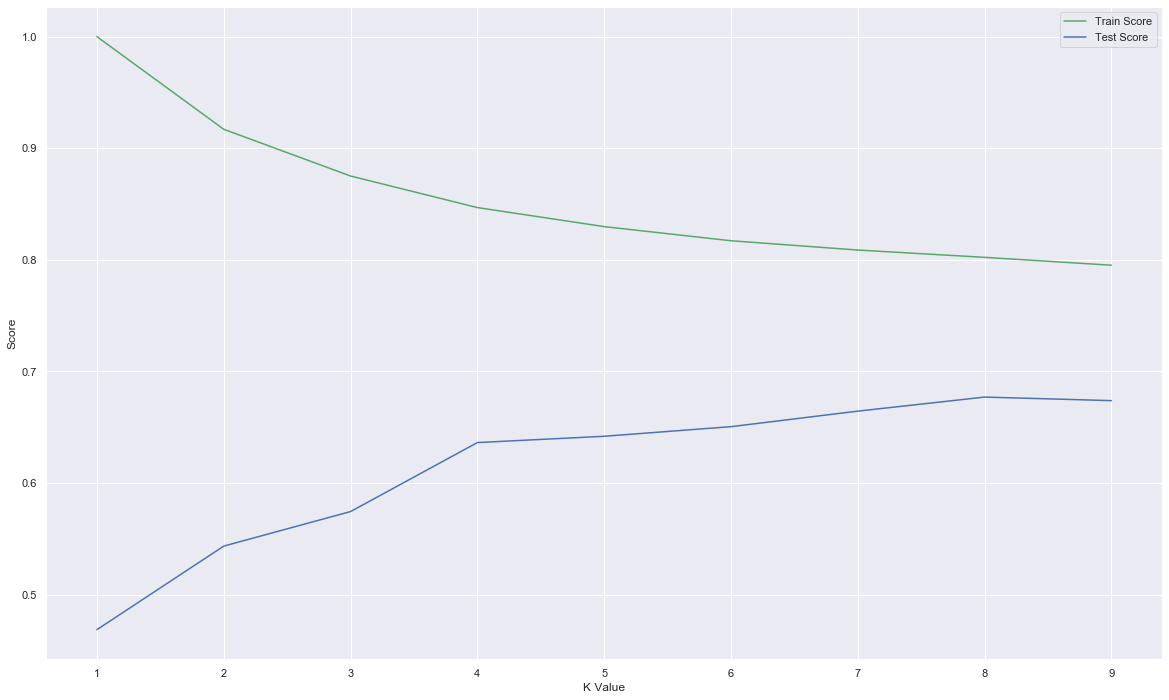

In [59]:
from sklearn.neighbors import KNeighborsRegressor

sns.set(rc={'figure.figsize':(20,12)})

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Score')

In [60]:
knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_train, y_train)

print(knn_reg.score(X_train, y_train))
print(knn_reg.score(X_test, y_test))

0.8468388058042496
0.6362835039640611


### Applying GridSearch on KNN

In [60]:
from pprint import pprint
pprint(knn_reg.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}


In [61]:
param_grid_knn = {
            'leaf_size' : range(1,50),
            'n_neighbors' : range(1,50),
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CV_knn.fit(X_train, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

Fitting 3 folds for each of 38416 candidates, totalling 115248 fits


c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.7min
[Parallel(n_jobs

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


### Using the best parameters for KNN Regressor obtained from GridSearch

In [61]:
knn_reg=KNeighborsRegressor(n_neighbors=6,leaf_size=1,weights='distance',algorithm='auto',p=1)

knn_reg.fit(X_train, y_train)

y_pred_knn=knn_reg.predict(X_test)

print('Train score: {:.4f} %'.format(knn_reg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(knn_reg.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))


reg_model = reg_model.append({'Model' : 'KNN Regressor',
                                                'Regressor' : 'KNN Regressor without PCA',
                                        'Train Score' : knn_reg.score(X_train, y_train),
                                       'Test Score' : knn_reg.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 100.0000 %
Test score: 71.9975 %
RMSE: 41048.0873


## [3] Ridge

In [62]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100, 1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

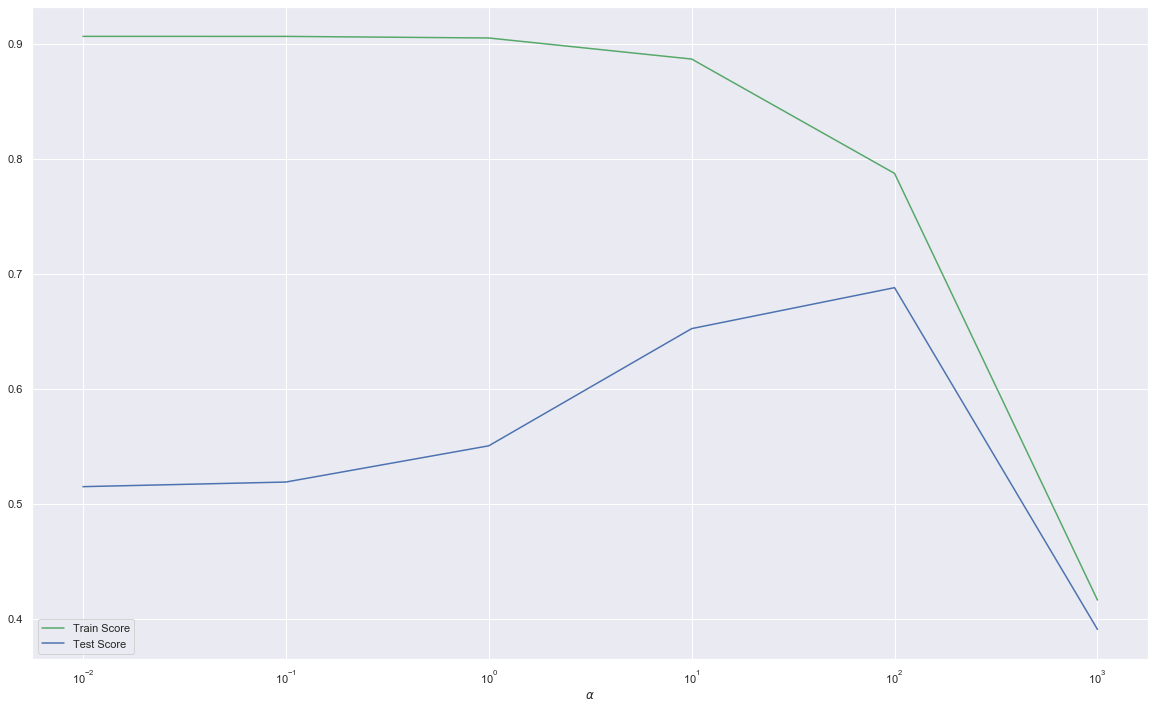

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,12)})

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [64]:
print(train_score_list)
print(test_score_list)

[0.9064124714857013, 0.9063851422312516, 0.9050028825822132, 0.8866792289841877, 0.7871930465589843, 0.41605154475203027]
[0.5146961798449683, 0.5187175921579421, 0.5502257534945283, 0.6521792604429691, 0.6877976428812039, 0.3905423483900968]


In [65]:
ridge = Ridge(alpha = 100)
ridge.fit(X_train,y_train)

y_pred=ridge.predict(X_test)

print('Train score: {:.4f} %'.format(ridge.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ridge.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Ridge Regressor',
                                                'Regressor' : 'Ridge Regressor without PCA',
                                        'Train Score' : ridge.score(X_train, y_train),
                                       'Test Score' : ridge.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 78.7193 %
Test score: 68.7798 %
RMSE: 43342.3995


In [66]:
ridge.coef_

array([ -2812.27082888,  -5658.02986761,  -1002.16488533,   9942.36279173,
         4556.30089361,   1056.52904161,  -7197.19593115,  -3088.45079434,
         -310.31996658,  -1554.64593576,   4519.51645833,   7845.60651146,
           84.0438709 ,     58.70621574, -10263.10710288,   -189.83748301,
        24595.49709203,   3185.21857778,   5960.86793922,  12853.2230915 ,
        10197.6950091 ,   3192.40965984,   -647.65864361,   1289.75850403,
         6417.40525845,  14413.8170667 , -22458.33645671,     99.31929133,
         4813.91649065, -23527.62632821,   2607.06345259, -11354.78068405,
        -2393.72644548,  18966.81955942,   1167.68659723,    838.29496391,
         6186.60784239,  18477.20965836,    284.68015137,  -9871.91913994,
         5651.61314086,   4216.82286823,  20565.45996133,  16655.14881781,
         1626.43591109,  22982.25416007,   8647.76937655,  -1101.13560387,
        15162.76525216,   9907.26174015,   5712.42174723,  -4163.90404907,
       -27248.73910847,  

In [67]:
ridge.intercept_

142452.4371995161

### Feature Importance from Ridge

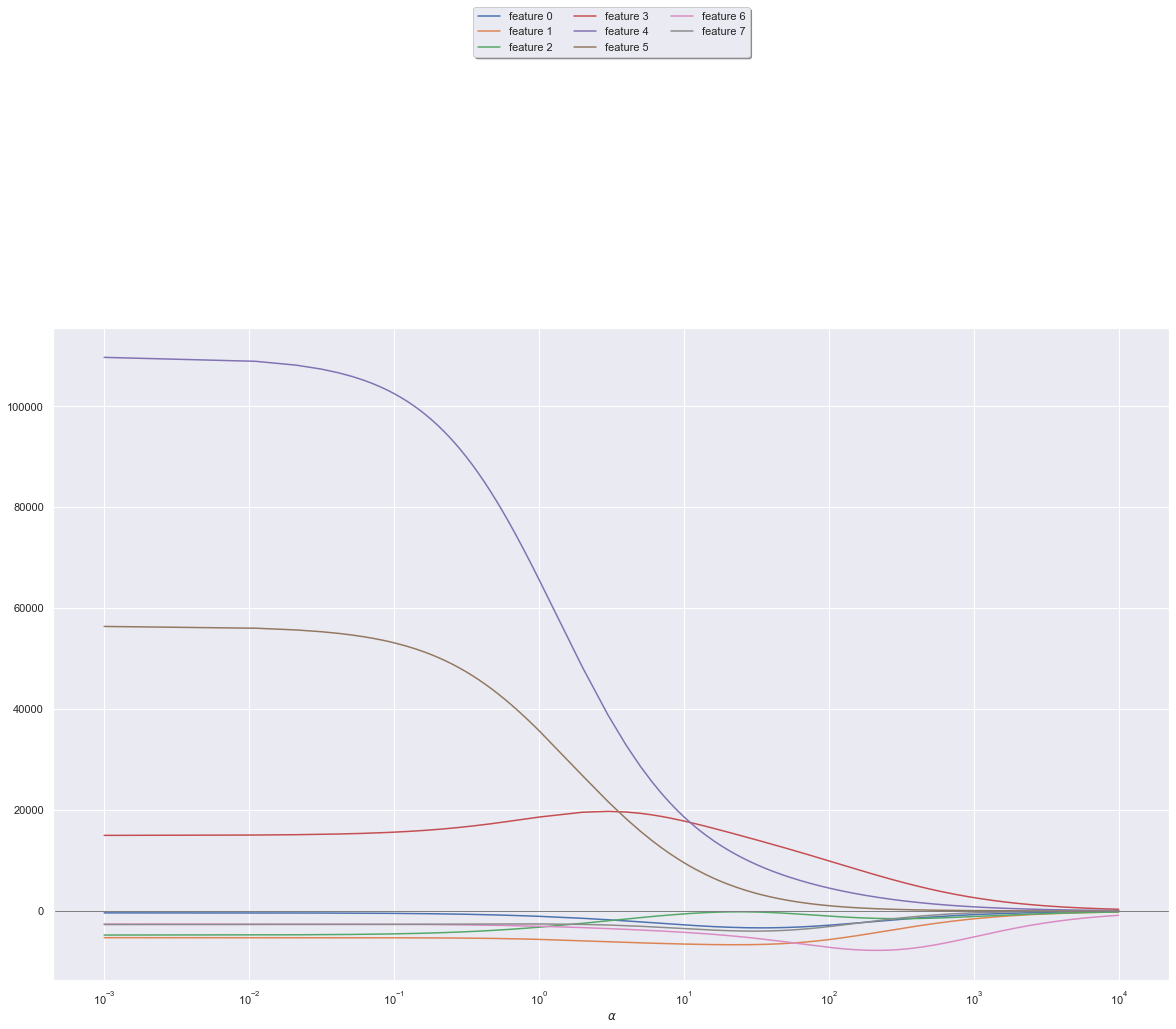

In [68]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## [4] LASSO

In [69]:
from sklearn.linear_model import Lasso
x_range = [0.1, 1, 10, 100, 1000, 10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

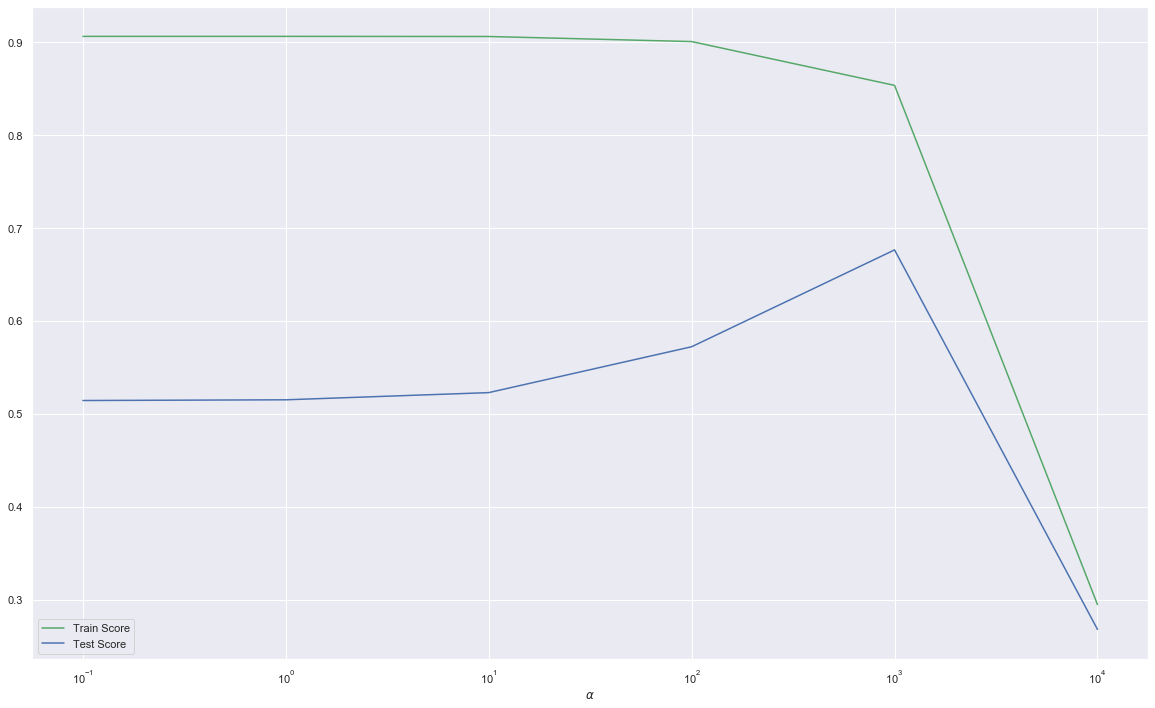

In [71]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [70]:
lasso = Lasso(alpha = 1000)
lasso.fit(X_train,y_train)

y_pred=lasso.predict(X_test)

print('Train score: {:.4f} %'.format(lasso.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


reg_model = reg_model.append({'Model' : 'Lasso',
                                                'Regressor' : 'Lasso without PCA',
                                        'Train Score' : lasso.score(X_train, y_train),
                                       'Test Score' : lasso.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 85.3640 %
Test score: 67.6489 %
RMSE: 44120.4260


### Feature Importance based on LASSO

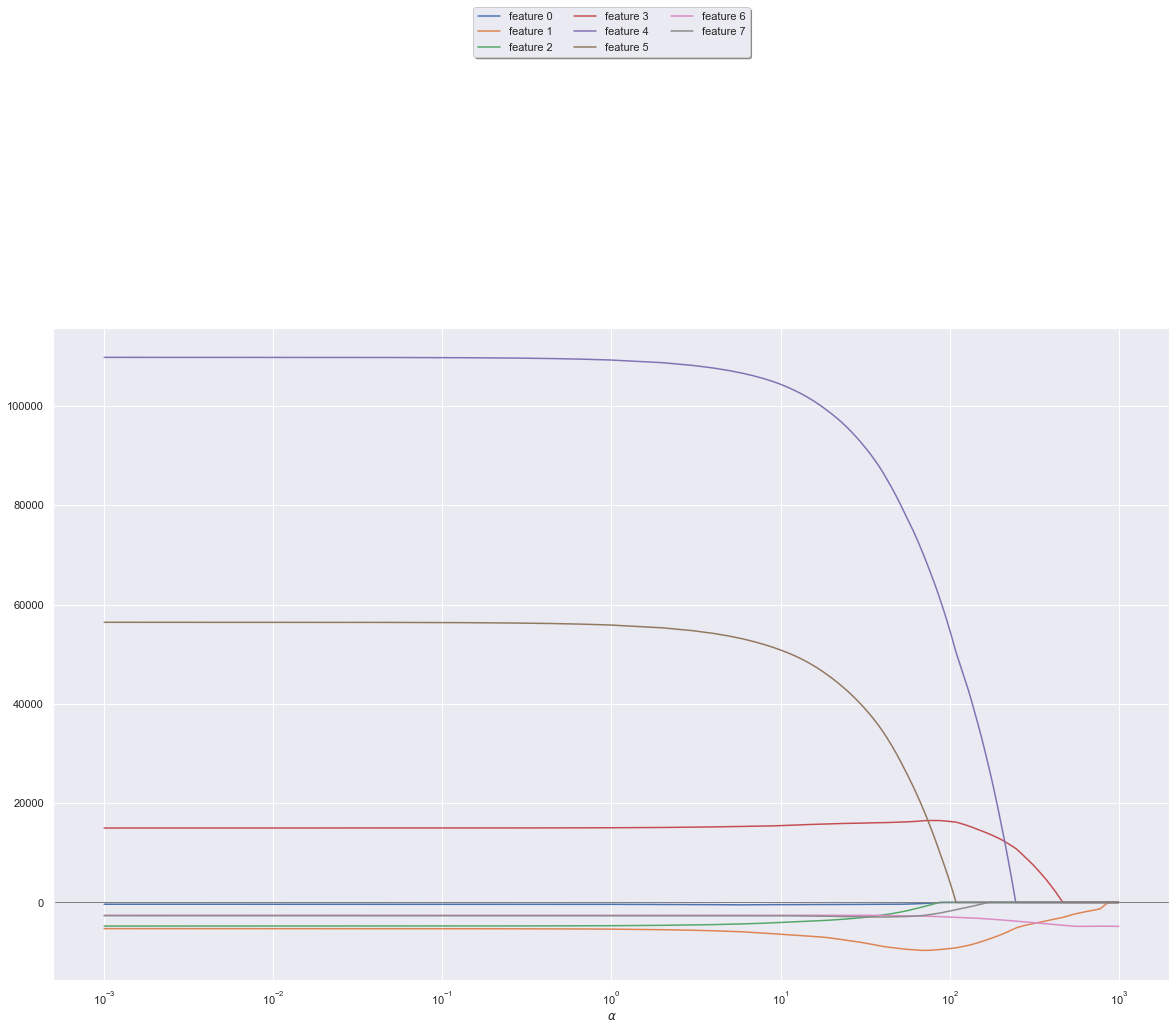

In [73]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})


x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## [5] Polynomial Regression

In [71]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [75]:
print(train_score_list)
print(test_score_list)

[0.9064150910837175, 1.0]
[0.51425042788032, -0.8574880401702851]


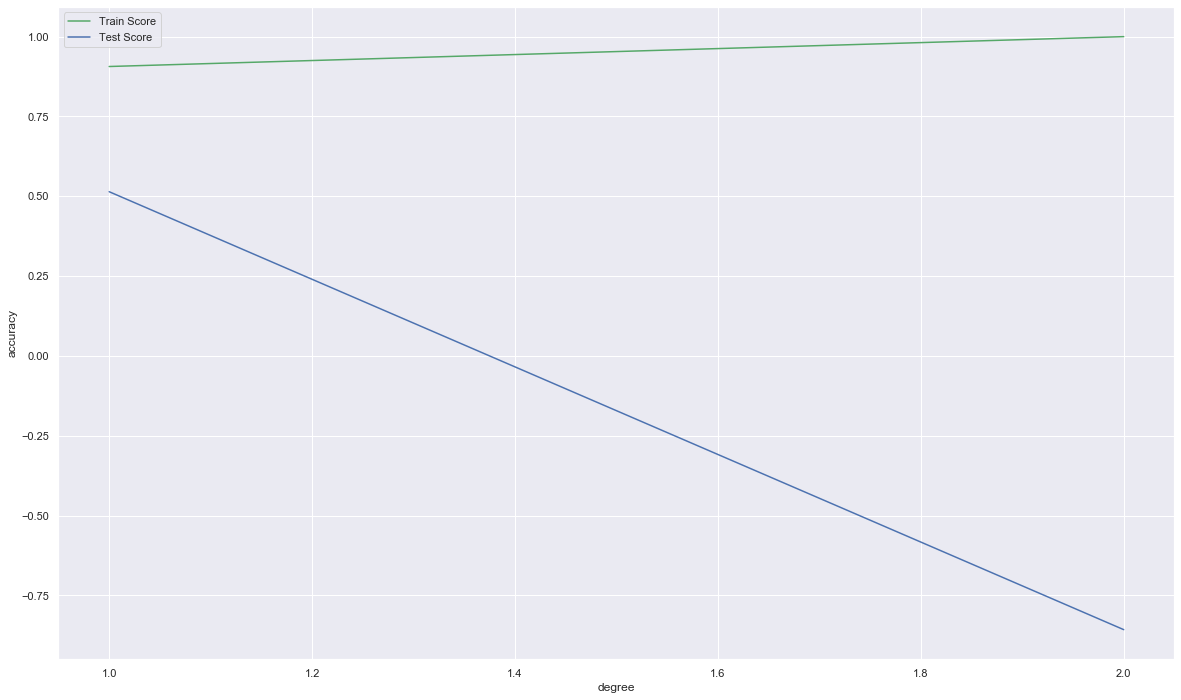

In [76]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})


x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [72]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

y_pred=lreg.predict(X_test_poly)

print('Train score: {:.4f} %'.format(lreg.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Polynomial Regression',
                                                'Regressor' : 'Polynomial Regression without PCA',
                                        'Train Score' : lreg.score(X_train_poly, y_train),
                                       'Test Score' : lreg.score(X_test_poly, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 90.6415 %
Test score: 51.4250 %
RMSE: 54063.1162


## [6] Decision Tree Regressor

Text(0, 0.5, 'Scores')

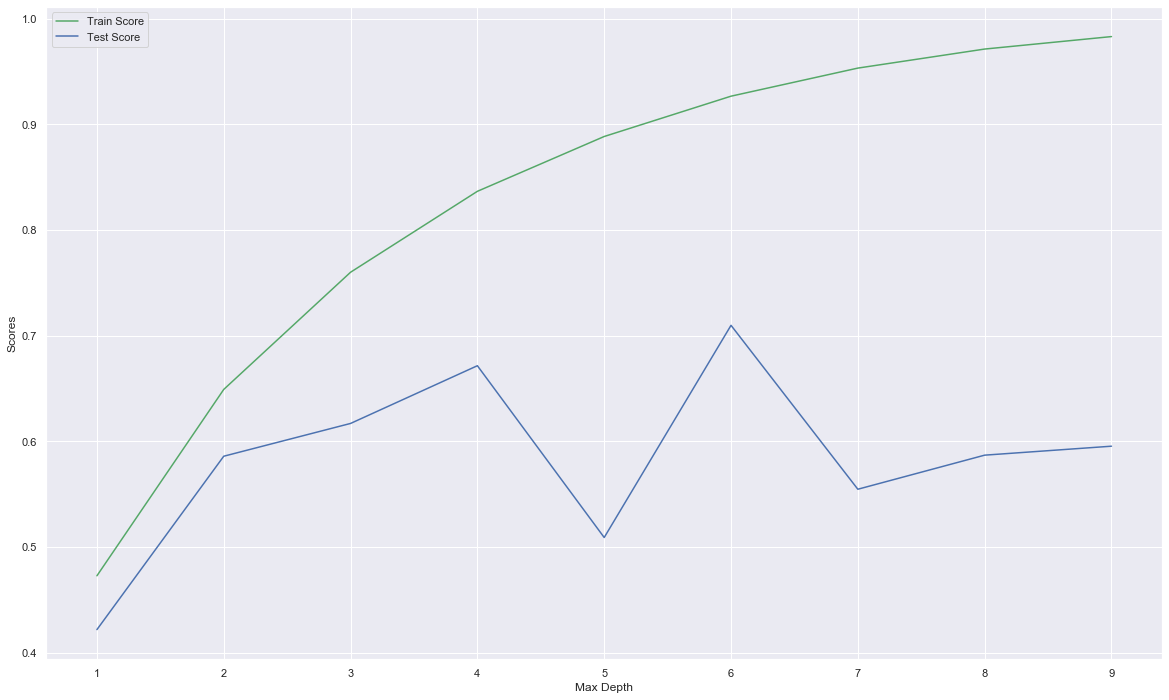

In [73]:
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []

for n in range(1,10):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    train_score_array.append(tree.score(X_train, y_train))
    test_score_array.append(tree.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [74]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_pred=tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 76.0034 %
Test score: 61.6959 %
RMSE: 48008.4522


### Applying Grid Search to Decision Tree Regressor

In [80]:
from pprint import pprint
pprint(tree.get_params())

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


In [81]:
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

CV_tree = GridSearchCV(estimator =tree, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1)
CV_tree.fit(X_train, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'max_depth': 5, 'min_samples_leaf': 1}


[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    0.5s finished


### Using best parameters obtained from GridSearch for Decision Tree Regressor

In [75]:
tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=1)
tree.fit(X_train, y_train)

y_pred=tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Decision Trees',
                                                'Regressor' : 'Decision Trees without PCA',
                                        'Train Score' : tree.score(X_train, y_train),
                                       'Test Score' : tree.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 88.8472 %
Test score: 64.4188 %
RMSE: 46270.6022


## [7] Linear Support Vector Machine

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Score')

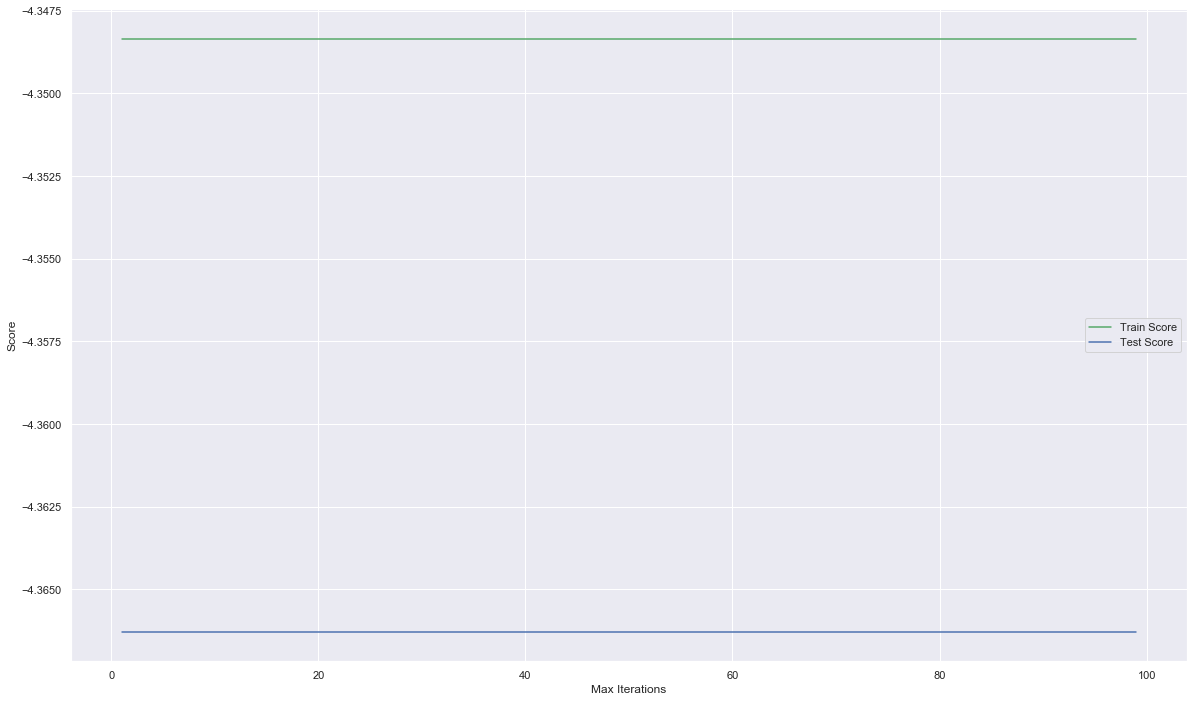

In [76]:
from sklearn.svm import LinearSVR

sns.set(rc={'figure.figsize':(20,12)})
linear_svm = LinearSVR()

linear_svm.fit(X_train, y_train)
y_pred=linear_svm.predict(X_test)

train_score_array = []
test_score_array = []

for n in range(1,100):
    linear_svm = LinearSVR(max_iter=n)
    linear_svm.fit(X_train, y_train)
    train_score_array.append(linear_svm.score(X_train, y_train))
    test_score_array.append(linear_svm.score(X_test, y_test))

x_axis = range(1,100)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')

In [77]:
linear_svm = LinearSVR(max_iter=1)
linear_svm.fit(X_train, y_train)

y_pred=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Linear SVM',
                                                'Regressor' : 'Linear SVR without PCA',
                                        'Train Score' : linear_svm.score(X_train, y_train),
                                       'Test Score' : linear_svm.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: -434.8344 %
Test score: -436.6278 %
RMSE: 179693.1102


c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## [8] SVR(kernel='linear')

In [78]:
from sklearn.svm import SVR

best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVR(gamma=gamma, C=C,kernel='linear')
        # perform cross-validation
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVR(**best_parameters)
svm.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

print('Train score: {:.4f} %'.format(svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(svm.score(X_test, y_test)*100))

reg_model = reg_model.append({'Model' : 'SVR(kernel=linear)',
                                                'Regressor' : 'SVR(kernel=linear) without PCA',
                                        'Train Score' : svm.score(X_train, y_train),
                                       'Test Score' : svm.score(X_test, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: -4.1468 %
Test score: -2.6064 %


## Regression Tasks with PCA

### Using Kernel PCA with 5 componenets

In [80]:
from sklearn.decomposition import KernelPCA

linear_pca = KernelPCA(n_components =5, kernel="linear", gamma=0.04)

X_train_pca= linear_pca.fit_transform(X_train)  
X_test_pca = linear_pca.transform(X_test)

print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

(936, 5)
(936,)
(402, 5)
(402,)


### [1] Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_pca, y_train)

y_pred = lreg.predict(X_test_pca)

print('Train score: {:.4f} %'.format(lreg.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test_pca, y_test)*100))

print('MAE: {:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


reg_model = reg_model.append({'Model' : 'Linear Regression',
                                                'Regressor' : 'Linear Regression without PCA',
                                        'Train Score' : lreg.score(X_train_pca, y_train),
                                       'Test Score' : lreg.score(X_test_pca, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 62.3220 %
Test score: 55.3684 %
MAE: 34429.5158
MSE: 2685545894.2000
RMSE: 51822.2529


## [2] KNN Regressor

Text(0, 0.5, 'Score')

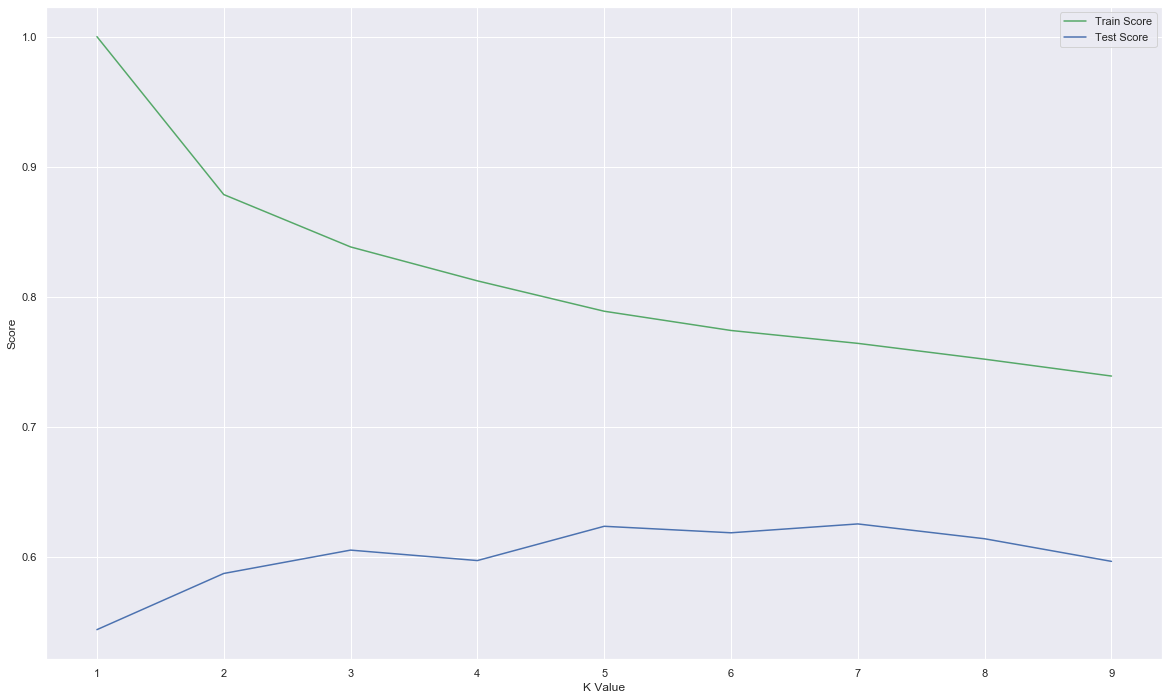

In [82]:
from sklearn.neighbors import KNeighborsRegressor

sns.set(rc={'figure.figsize':(20,12)})

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_pca, y_train)
    train_score_array.append(knn_reg.score(X_train_pca, y_train))
    test_score_array.append(knn_reg.score(X_test_pca, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Score')

In [83]:
knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_train_pca, y_train)

print(knn_reg.score(X_train_pca, y_train))
print(knn_reg.score(X_test_pca, y_test))

0.8382303694224259
0.6049910392888658


### Applying GridSearch on KNN

In [91]:
from pprint import pprint
pprint(knn_reg.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}


In [92]:
param_grid_knn = {
            'leaf_size' : range(1,50),
            'n_neighbors' : range(1,50),
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CV_knn.fit(X_train_pca, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

Fitting 3 folds for each of 38416 candidates, totalling 115248 fits


c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1612 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 3112 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 5212 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 7912 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 11212 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 15112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 19612 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 24712 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 30412 tasks      | elapsed:  2.0min
[Paralle

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


### Using the best parameters for KNN Regressor obtained from GridSearch

In [84]:
knn_reg=KNeighborsRegressor(n_neighbors=13,leaf_size=1,weights='distance',algorithm='auto',p=1)

knn_reg.fit(X_train_pca, y_train)

y_pred_knn=knn_reg.predict(X_test_pca)

print('Train score: {:.4f} %'.format(knn_reg.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(knn_reg.score(X_test_pca, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))


reg_model = reg_model.append({'Model' : 'KNN Regressor',
                                                'Regressor' : 'KNN Regressor with PCA',
                                        'Train Score' : knn_reg.score(X_train_pca, y_train),
                                       'Test Score' : knn_reg.score(X_test_pca, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 100.0000 %
Test score: 61.1326 %
RMSE: 48360.1385


## [3] Ridge

In [85]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,y_train)
    train_score_list.append(ridge.score(X_train_pca,y_train))
    test_score_list.append(ridge.score(X_test_pca, y_test))

Text(0.5, 0, '$\\alpha$')

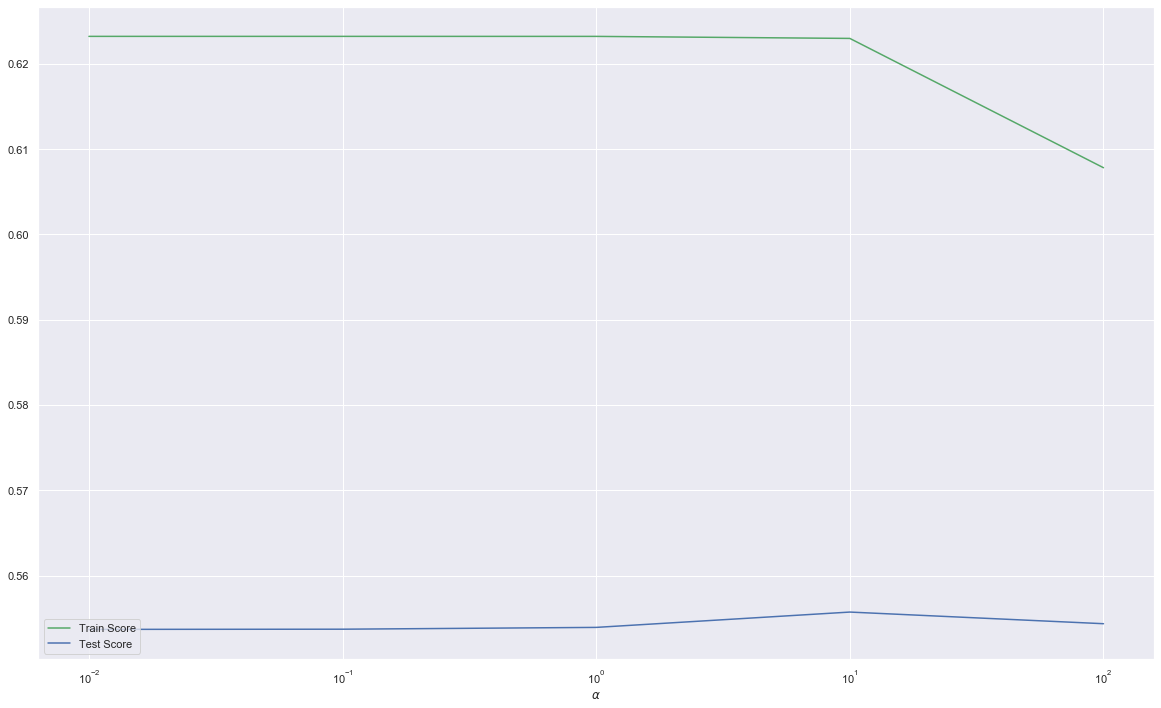

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,12)})

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [87]:
print(train_score_list)
print(test_score_list)

[0.6232200938084296, 0.6232200683629899, 0.6232175399616008, 0.6229796659002067, 0.6078181715903408]
[0.5536859850055095, 0.5537075025952629, 0.5539192553163264, 0.5557164892696906, 0.5543510112749213]


In [88]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train_pca,y_train)

y_pred=ridge.predict(X_test_pca)

print('Train score: {:.4f} %'.format(ridge.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(ridge.score(X_test_pca, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Ridge Regressor',
                                                'Regressor' : 'Ridge Regressor with PCA',
                                        'Train Score' : ridge.score(X_train_pca, y_train),
                                       'Test Score' : ridge.score(X_test_pca, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 62.2980 %
Test score: 55.5716 %
RMSE: 51704.0972


In [89]:
ridge.coef_

array([ 75237.03099303,  -3725.63460837,   9582.34462839, -15255.18667112,
        19933.3548046 ])

In [90]:
ridge.intercept_

187840.28739316232

## [4] LASSO

In [91]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    train_score_list.append(lasso.score(X_train_pca,y_train))
    test_score_list.append(lasso.score(X_test_pca, y_test))

Text(0.5, 0, '$\\alpha$')

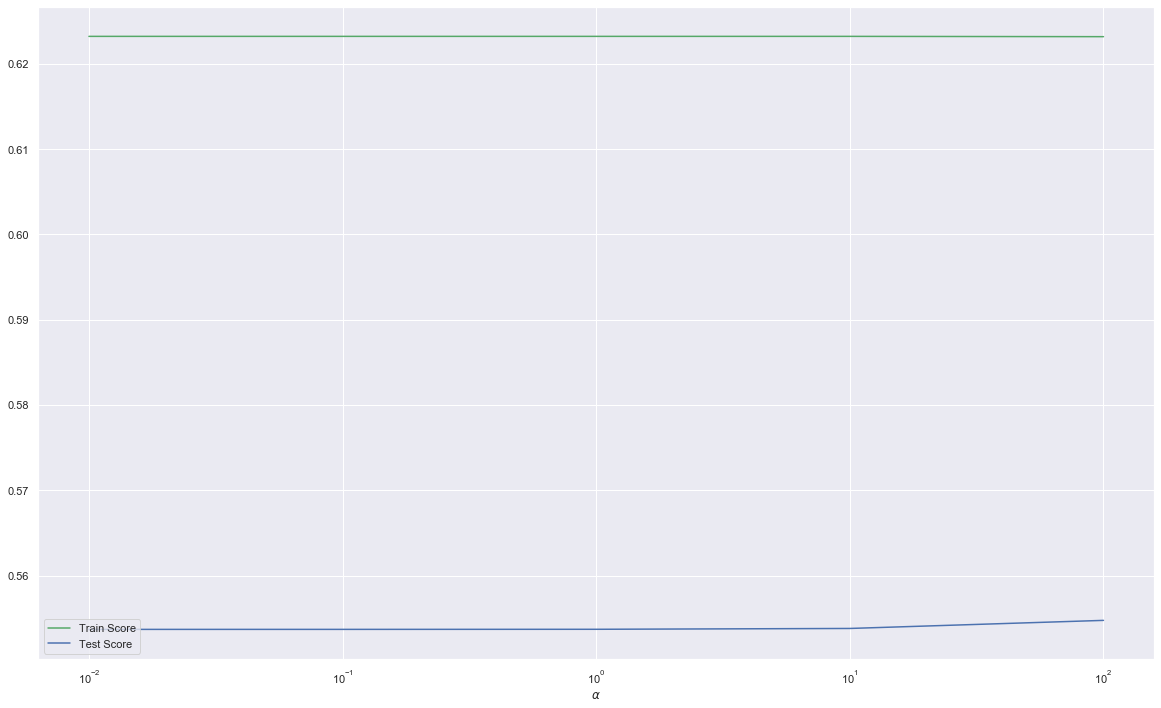

In [92]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [93]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_pca,y_train)

y_pred=lasso.predict(X_test_pca)

print('Train score: {:.4f} %'.format(lasso.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test_pca, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


reg_model = reg_model.append({'Model' : 'Lasso',
                                                'Regressor' : 'Lasso with PCA',
                                        'Train Score' : lasso.score(X_train_pca, y_train),
                                       'Test Score' : lasso.score(X_test_pca, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 62.3220 %
Test score: 55.3684 %
RMSE: 51822.2465


## [5] Polynomial Regression

In [94]:
train_score_list = []
test_score_list = []

for n in range(1,7):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_pca)
    X_test_poly = poly.transform(X_test_pca)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [95]:
print(train_score_list)
print(test_score_list)

[0.6232200940656187, 0.7171397193488092, 0.7693181933917563, 0.8108160759035553, 0.857698888541396, 0.9204056642564765]
[0.5536835902936063, 0.5532689476990653, 0.4989049257055464, 0.5531506343070522, 0.4089432197173166, -4.109718054385727]


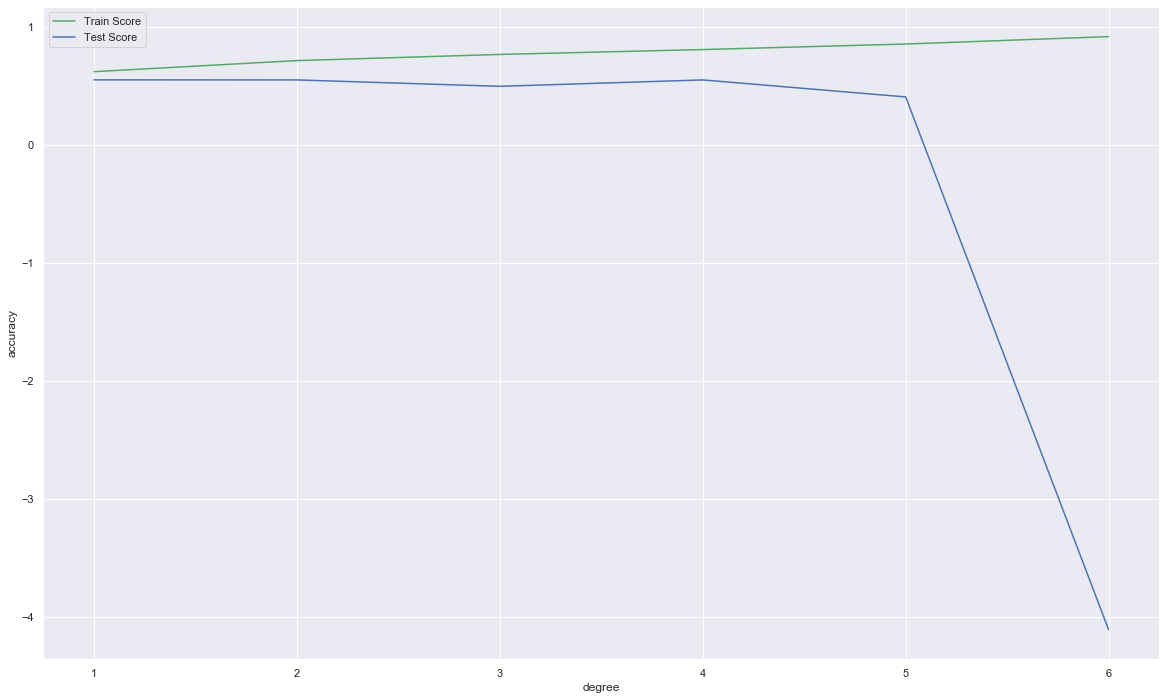

In [96]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})


x_axis = range(1,7)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [97]:
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)
lreg.fit(X_train_poly, y_train)

y_pred=lreg.predict(X_test_poly)

print('Train score: {:.4f} %'.format(lreg.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Polynomial Regression',
                                                'Regressor' : 'Polynomial Regression with PCA',
                                        'Train Score' : lreg.score(X_train_poly, y_train),
                                       'Test Score' : lreg.score(X_test_poly, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 81.0816 %
Test score: 55.3151 %
RMSE: 51853.1847


## [6] Decision Tree Regressor

Text(0, 0.5, 'Scores')

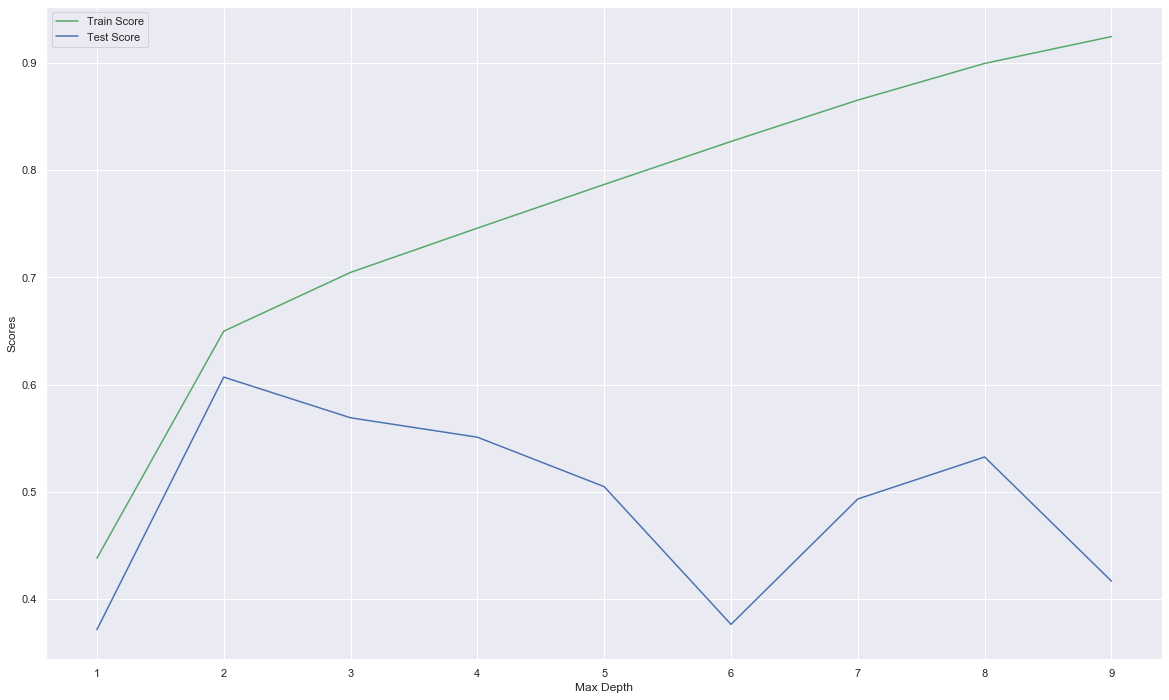

In [98]:
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []

for n in range(1,10):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train_pca, y_train)
    train_score_array.append(tree.score(X_train_pca, y_train))
    test_score_array.append(tree.score(X_test_pca, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [99]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_pca, y_train)

y_pred=tree.predict(X_test_pca)

print('Train score: {:.4f} %'.format(tree.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test_pca, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 70.4629 %
Test score: 56.8987 %
RMSE: 50926.0734


### Applying Grid Search to Decision Tree Regressor

In [100]:
from pprint import pprint
pprint(tree.get_params())

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


In [101]:
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

CV_tree = GridSearchCV(estimator =tree, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1)
CV_tree.fit(X_train_pca, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 5, 'min_samples_leaf': 4}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    2.6s finished


### Using best parameters obtained from GridSearch for Decision Tree Regressor

In [102]:
tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=4)
tree.fit(X_train_pca, y_train)

y_pred=tree.predict(X_test_pca)

print('Train score: {:.4f} %'.format(tree.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test_pca, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Decision Trees',
                                                'Regressor' : 'Decision Trees with PCA',
                                        'Train Score' : tree.score(X_train_pca, y_train),
                                       'Test Score' : tree.score(X_test_pca, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: 77.1327 %
Test score: 53.5514 %
RMSE: 52866.5888


## [7] Linear Support Vector Machine

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Score')

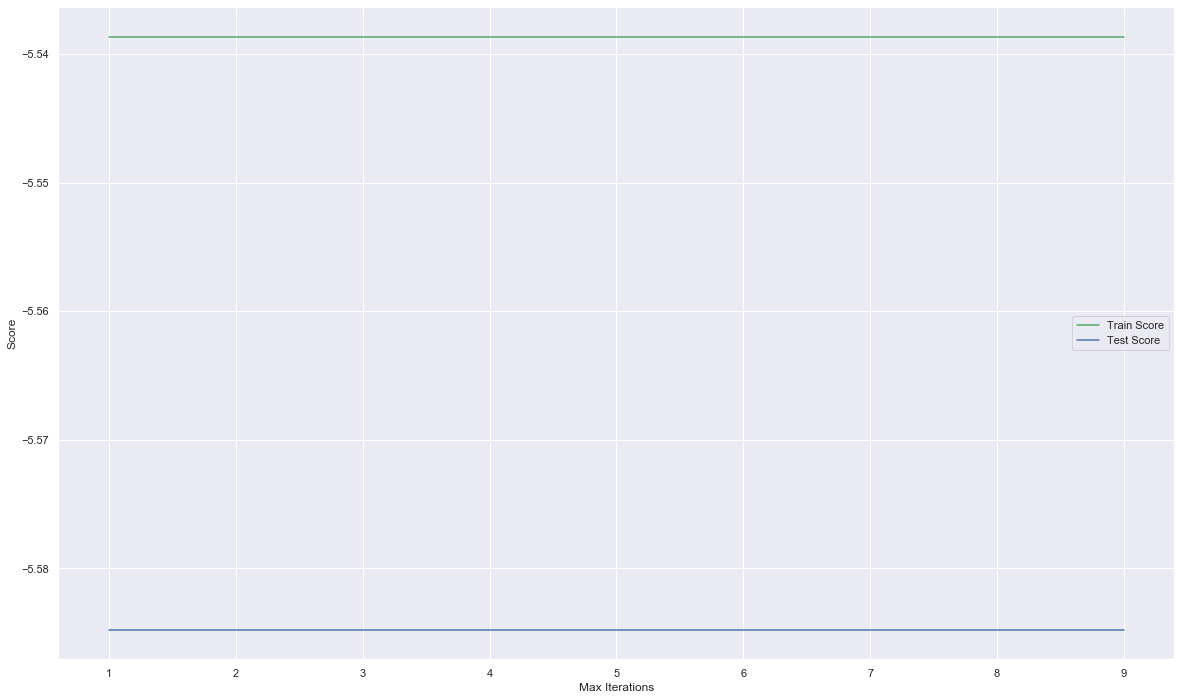

In [103]:
from sklearn.svm import LinearSVR

sns.set(rc={'figure.figsize':(20,12)})
linear_svm = LinearSVR()

linear_svm.fit(X_train_pca, y_train)
y_pred=linear_svm.predict(X_test_pca)

train_score_array = []
test_score_array = []

for n in range(1,10):
    linear_svm = LinearSVR(max_iter=n)
    linear_svm.fit(X_train_pca, y_train)
    train_score_array.append(linear_svm.score(X_train_pca, y_train))
    test_score_array.append(linear_svm.score(X_test_pca, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')

In [113]:
linear_svm = LinearSVR(max_iter=1)
linear_svm.fit(X_train_pca, y_train)

y_pred=linear_svm.predict(X_test_pca)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_pca, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

reg_model = reg_model.append({'Model' : 'Linear SVM',
                                                'Regressor' : 'Linear SVR with PCA',
                                        'Train Score' : linear_svm.score(X_train_pca, y_train),
                                       'Test Score' : linear_svm.score(X_test_pca, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: -553.8646 %
Test score: -558.4761 %
RMSE: 199051.2262


c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### [8] SVR(kernel='linear')

In [104]:
from sklearn.svm import SVR

best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVR(gamma=gamma, C=C,kernel='linear')
        # perform cross-validation
        scores = cross_val_score(svm, X_train_pca, y_train, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVR(**best_parameters)
svm.fit(X_train_pca, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [105]:
svm.fit(X_train_pca,y_train)
y_pred=svm.predict(X_test_pca)

print('Train score: {:.4f} %'.format(svm.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(svm.score(X_test_pca, y_test)*100))

reg_model = reg_model.append({'Model' : 'SVR(kernel=linear)',
                                                'Regressor' : 'SVR(kernel=linear) with PCA',
                                        'Train Score' : svm.score(X_train_pca, y_train),
                                       'Test Score' : svm.score(X_test_pca, y_test),
                                       'MSE' : mean_squared_error(y_test,y_pred),
                                    'MAE' : mean_absolute_error(y_test,y_pred), 
                                     'RMSE' : np.sqrt(mean_squared_error(y_test,y_pred))},
                                               ignore_index=True)

Train score: -4.1470 %
Test score: -2.6071 %


## [H] Model Summary

In [106]:
reg_model.head(50)

,Model,Regressor,Train Score,Test Score,MSE,MAE,RMSE
0,Bagging Regressor,Decision Trees,0.949034,0.772882,1.366597e+09,18404.773849,36967.511361
1,Bagging Regressor,Random Forests,0.922525,0.768058,1.395624e+09,18527.026662,37358.045867
2,Pasting Regressor,SVR(kernel=linear),0.438511,0.421868,3.478696e+09,34332.388938,58980.469198
3,Pasting Regressor,Decision Trees,0.940277,0.727157,1.641730e+09,20131.688676,40518.269052
4,Adaboost Regressor,Decision Trees,0.973276,0.684732,1.897008e+09,20086.987704,43554.658213
5,Adaboost Regressor,SVR(kernel=linear),0.566670,0.532003,2.815998e+09,32009.503968,53065.981642
6,GradientBoostingRegressor,GradientBoostingRegressor,0.984014,0.674412,1.959108e+09,16924.975975,44261.816217
7,Deep Learning Model,Perceptron,0.900000,0.860000,6.047819e+09,56225.149565,77767.723123
8,Deep Learning Model,MLP,0.900000,0.860000,6.021593e+09,55206.038169,77598.921474
9,Linear Regression,Linear Regression without PCA,0.903704,0.523518,2.867055e+09,22177.238806,53544.884662


We see here that:
1. In Bagging regressor, both Decision tree and Random Forest regressors over fits the data
2. In Pasting regressor,  SVR with linear Kernel underfits the data while Decision Tree overfits the data.
3. In AdaBoost regressor, Decision Tree model over fits the data and SVR model underfits the data
4. In Gradient Boosting Regressor, the model overfits the data
5. Deep Learning model here gives us the best result with 90% train score and 86% test score. Hence our best model so far which has properly fit the data has been Perceptron and MLP


The RMSE score for the reduced dataset is somewhat similar than the score of the unreduced dataset(exception – Ridge and Lasso where the RMSE for the unreduced data is more than  for the unreduced dataset)We have used 5 PC for our different models. There is not much difference in the scores for the reduced and unreduced data, maybe because we have taken fewer number of Principal Components. We see that our model over fits the data even after using PCA)
The above results shows that irrespective of performing PCA on the models, almost all models overfits the data. The Ridge regressor model (without PCA) with 78% train score and 68% test score can be considered as the optimum model here as we can say it somewhat fits the data.

The best feature according to our Ridge regressor has been the LotArea followed by LotFrontage. 

After performing Ensemble learning and Neural Networks, we see that even Ensemble Learning couldn’t remove the overfitting problem. However, we could see that the Deep Learning model gave 86% test score against 90% train score. Hence, this model had perfectly fit the data.

# [I] Next Steps

If we got the opportunity to invest more time, our next steps would have been to increase the instances of the data set or to perform feature importance with respect to each models and remove the least important features and then perform the analysis again. This would have helped us cater the overfitting problem of the data. 
